# TABLE OF CONTENTS:

### - PART 1: CHECK IMBALANCE
### - PART 2: CHECK OUTLIER
### - PART 3: CHECK MISSING VALUES
### - PART 4: CHECK CATEGORICAL COLUMNS 
### - PART 5: EDA
### - PART 6: OBSERVATION AND CONCLUSION

In [1]:
from utils import *
from input import path_to_data

In [2]:
import pandas as pd
import numpy as np
import os

#for 100% jupyter notebook cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pandas DataFrame column and row display limits
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

%matplotlib inline

**dseb63_application_train.csv**\
Training dataset (Main DataFrame)

In [3]:
application_train = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_train.csv'), index_col=0)

In [4]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,

In [5]:
print('-'*90)
print(f'The shape of dseb63_application_train.csv is: {application_train.shape}')
print('-'*90)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*90)

------------------------------------------------------------------------------------------
The shape of dseb63_application_train.csv is: (246009, 122)
------------------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
------------------------------------------------------------------------------------------


# *0. LOOKTHROUGH DATA*

**dseb63_bureau_balance.csv**\
This table consists of Monthly balance of each credit for each of the previous credit that the client had with financial institutions other than Home Credit.

In [6]:
bureau_balance = pd.read_csv(os.path.join(path_to_data, 'dseb63_bureau_balance.csv'))
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
bureau_balance.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [8]:
print(f'The shape of dseb63_bureau_balance.csv is: {bureau_balance.shape}')
print('-'*90)
print(f'Number of duplicate values in bureau_balance: {bureau_balance.shape[0] - bureau_balance.duplicated().shape[0]}')# 

The shape of dseb63_bureau_balance.csv is: (27299925, 3)
------------------------------------------------------------------------------------------
Number of duplicate values in bureau_balance: 0


In [9]:
print(f'Number of unique SK_ID_BUREAU in bureau_balance.csv are: {len(bureau_balance.SK_ID_BUREAU.unique())}')
print('-'*90)
print(f'Number of unique values for STATUS are: {len(bureau_balance.STATUS.unique())}')
print(f"Unique values of STATUS are:\n{bureau_balance.STATUS.unique()}")
print('-'*90)
print(f"Max number of months for Months Balance: {np.abs(bureau_balance.MONTHS_BALANCE.min())}")

Number of unique SK_ID_BUREAU in bureau_balance.csv are: 817395
------------------------------------------------------------------------------------------
Number of unique values for STATUS are: 8
Unique values of STATUS are:
['C' '0' 'X' '1' '2' '3' '5' '4']
------------------------------------------------------------------------------------------
Max number of months for Months Balance: 96


# *1. IMBALANCE*

In [10]:
imbalance_col(bureau_balance)

Imbalance Ratio for column 'MONTHS_BALANCE': None
Imbalance Ratio for column 'STATUS': 0.0004
------------------------------------------------------------------------------------------
The column with the heaviest imbalance ratio is 'STATUS' with ratio 0.0004


##### Observations and Conclusions
The table has almost little or no imbalance on the dataset

# *2. Outlier*

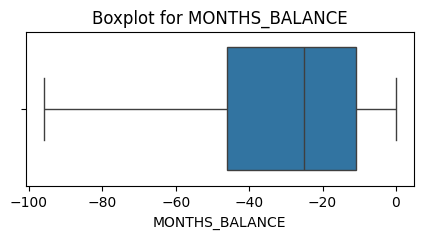

Rows with outliers:
Empty DataFrame
Columns: [MONTHS_BALANCE]
Index: []


In [11]:
outlier(bureau_balance)

##### Observations and Conclusions

There are no rows with outliers in the specified columns. An empty DataFrame indicates that there are no observations or data points identified as outliers according to the criteria or method used for outlier detection.

# *3. NaN Percentage*

In [12]:
nan_bureau_bl = nan_percent(bureau_balance)
nan_bureau_bl

,Column,Percentage_of_NaN
0,SK_ID_BUREAU,0.0
1,MONTHS_BALANCE,0.0
2,STATUS,0.0


In [13]:
plot_nan_percent(nan_bureau_bl, 'bureau_balance', tight_layout = False, figsize = (10,6))

The dataframe bureau_balance does not contain any NaN values.


##### Observations and Conclusions

It appears that there are no missing values (NaN) in the columns 'MONTHS_BALANCE,' and 'STATUS' in  dataset (0% reported)

# *4.  CATEGORICAL COLUMN*

In [14]:
cate_bb = get_category_column(bureau_balance)
cate_bb

,Feature,Nunique,Percentage of NaN
0,STATUS,8,0.0


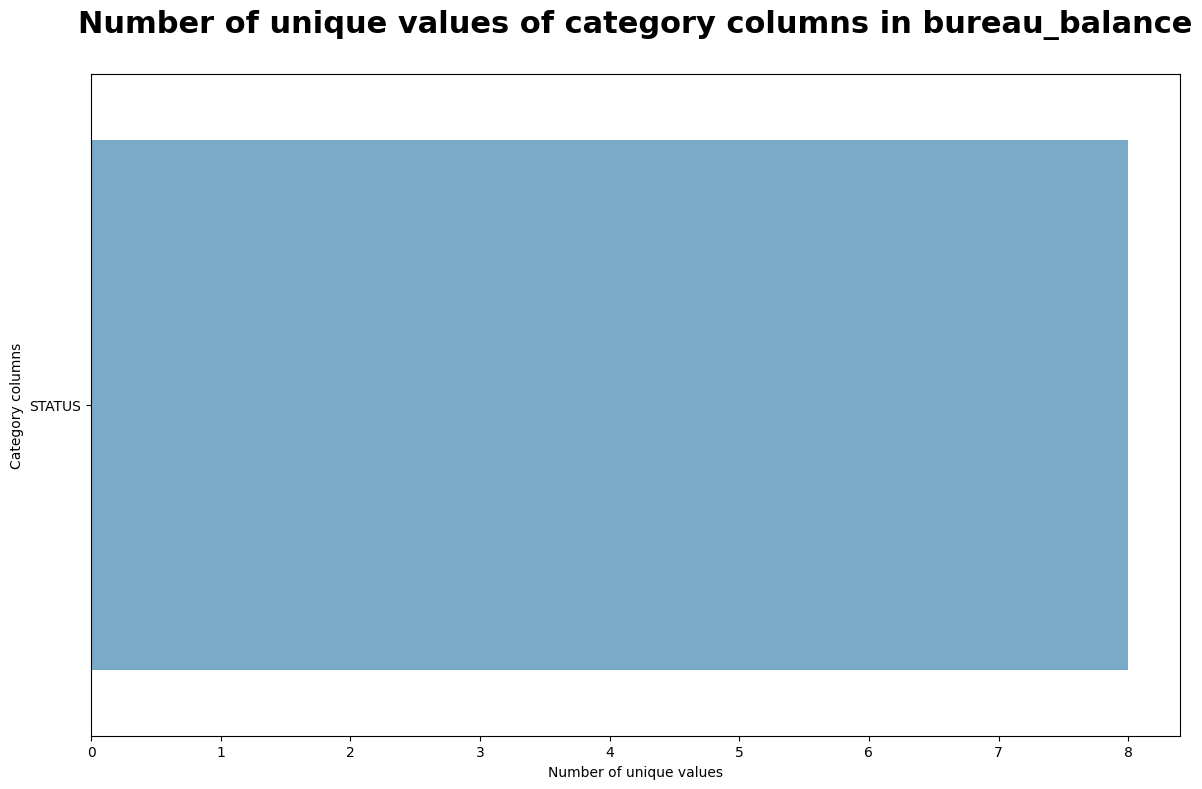

In [15]:
plot_category_column(cate_bb, 'bureau_balance')

##### Observations and Conclusions

Feature: 'STATUS'
- Number of Unique Values (Nunique): 8
- Percentage of NaN Values: 0.0%

This indicates that the 'STATUS' feature has 8 unique values, and there are no missing values (NaN) for this particular feature. Having no missing values is beneficial for data analysis and modeling, as it eliminates the need for imputation or handling missing data.

# *5. EDA*

### 5.1. MERGE with TARGET columns in application_train.csv to get more insights

##### a. First, we will merge the bureau_balance.csv with bureau.csv

In [16]:
bureau = pd.read_csv(os.path.join(path_to_data, 'dseb63_bureau.csv'))

In [17]:
bb_merged_prev = pd.merge(bureau[['SK_ID_CURR','SK_ID_BUREAU']], bureau_balance, how= 'left', on=['SK_ID_BUREAU'])
bb_merged_prev.head()

,SK_ID_CURR,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,254629,5714462,NaN,NaN
1,254629,5714463,NaN,NaN
2,254629,5714464,NaN,NaN
3,254629,5714465,NaN,NaN
4,254629,5714466,NaN,NaN


##### b. Then, merge all bureau (which is already merged with bureau_balance) with application_train.csv

In [18]:
bb_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], bb_merged_prev, how='left', on=['SK_ID_CURR'])
bb_merged.head()

,SK_ID_CURR,TARGET,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,278621,0,5885877.0,NaN,NaN
1,278621,0,5885878.0,NaN,NaN
2,278621,0,5885879.0,NaN,NaN
3,278621,0,5885880.0,NaN,NaN
4,139008,0,NaN,NaN,NaN


#### - MONTHS_BALANCE feature

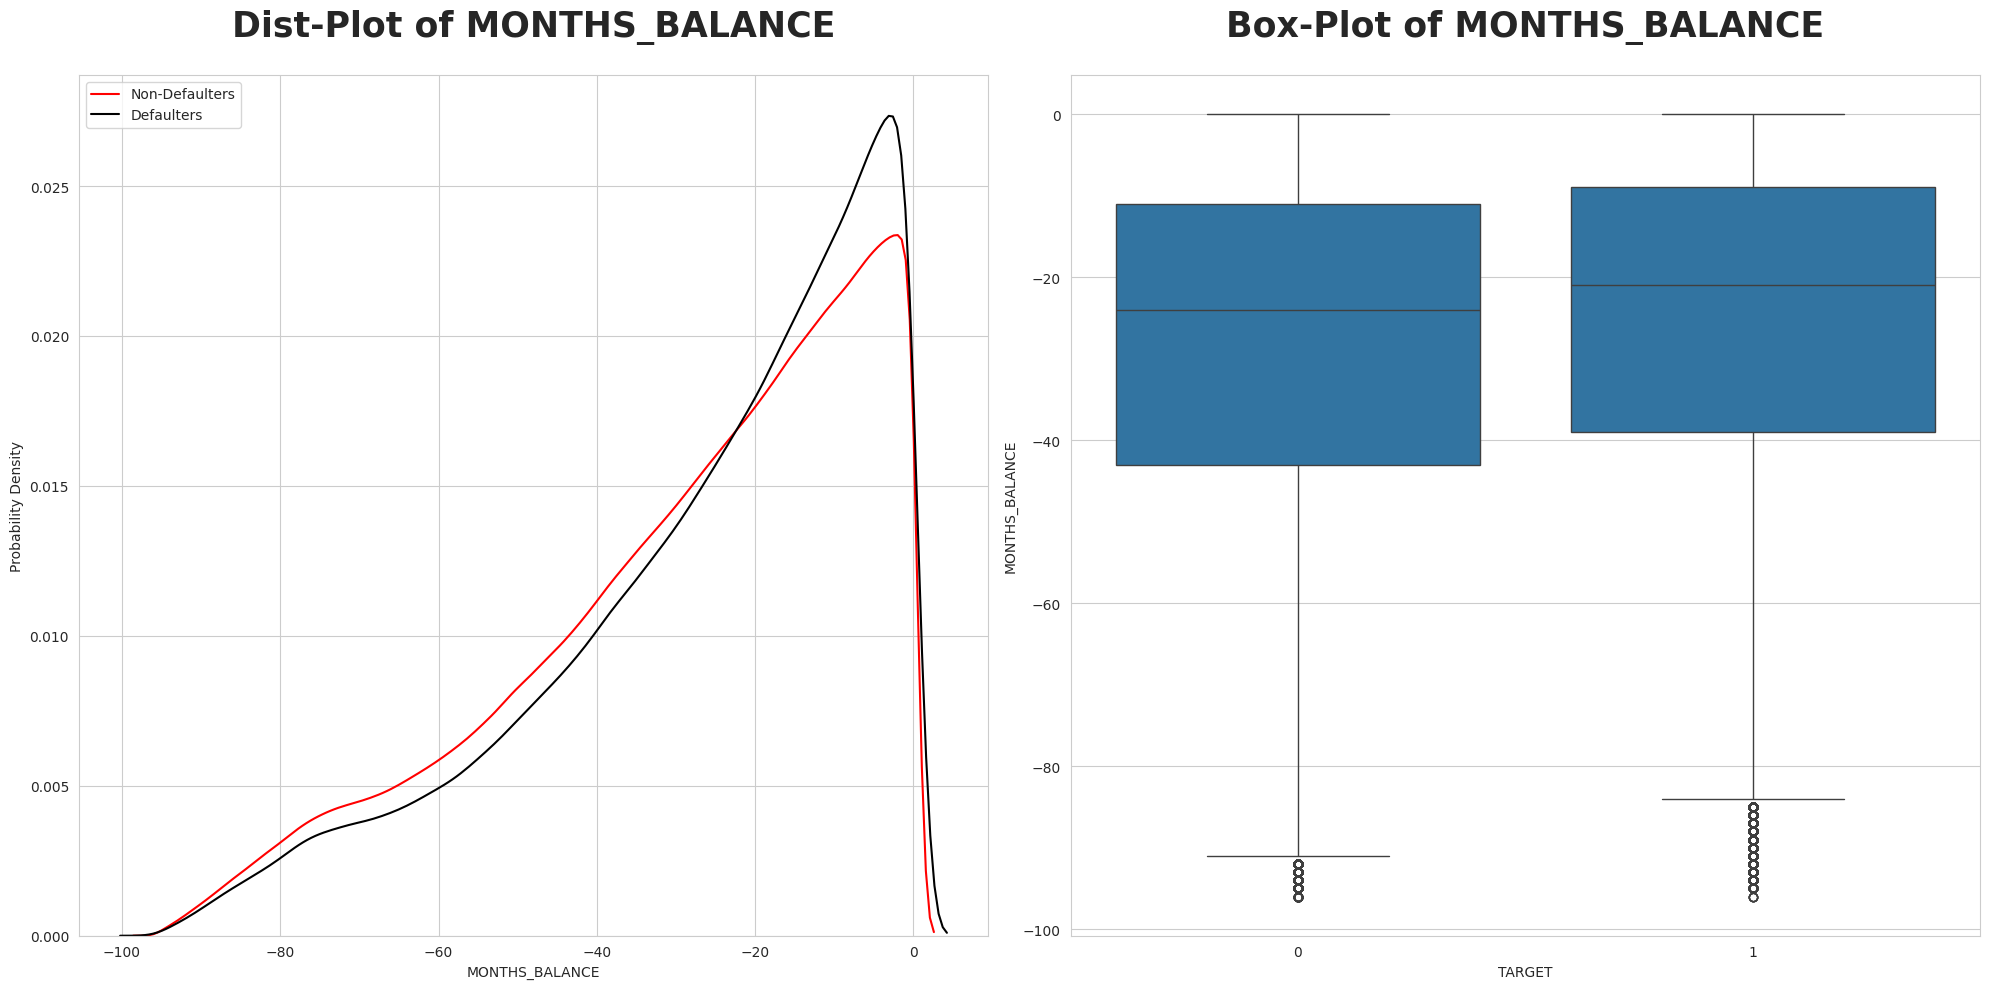

In [19]:
plot_continuous_variables(bb_merged, 'MONTHS_BALANCE', plots=['distplot','box'], figsize=(20,10))

Total Number of unique categories of STATUS = 9


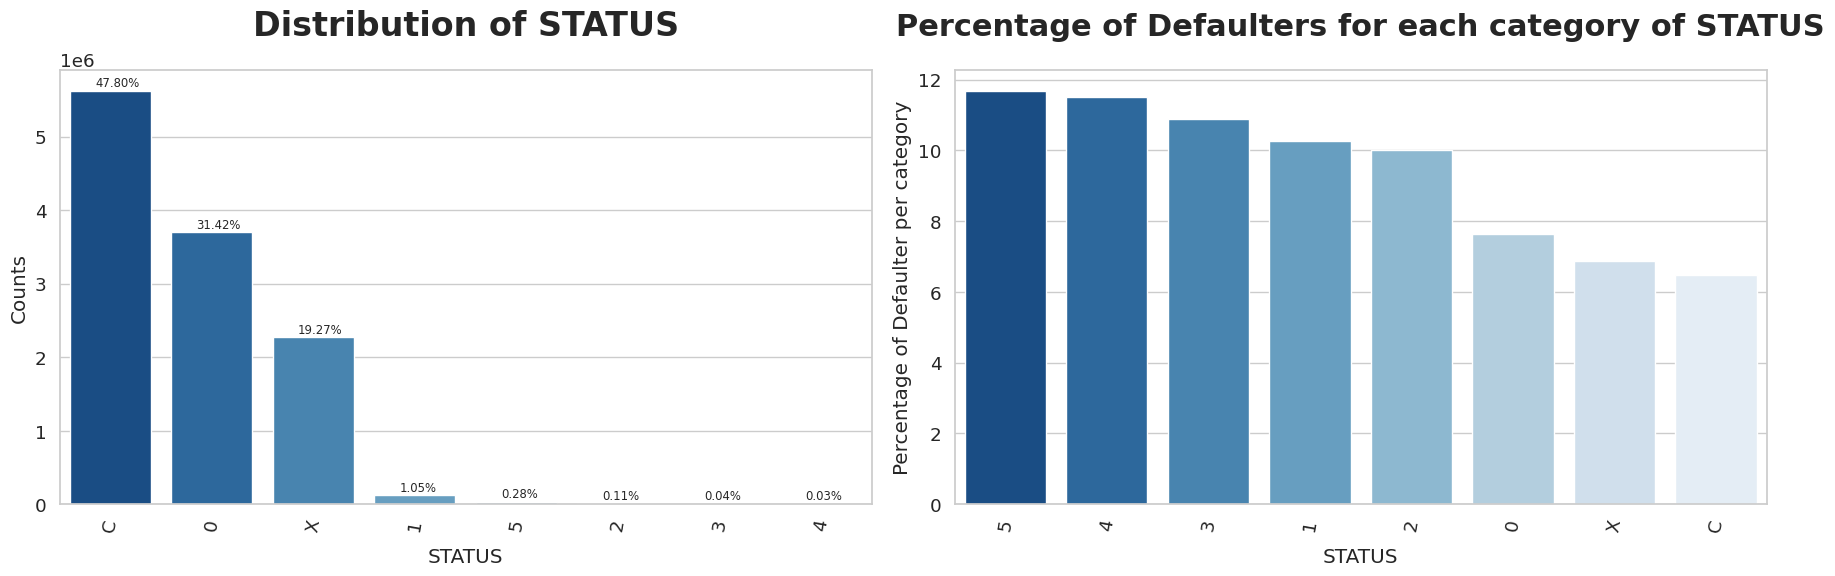

In [20]:
plot_categorical_variables_bar(bb_merged,'STATUS',rotation=80, horizontal_adjust=0.25 )

#### - Number of STATUS per customer

In [21]:
gp = bb_merged[['SK_ID_CURR', 'STATUS', 'TARGET']].groupby(['SK_ID_CURR','TARGET'])['STATUS'].nunique().reset_index()
gp

,SK_ID_CURR,TARGET,STATUS
0,0,0,0
1,1,1,2
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
246004,307505,0,2
246005,307506,0,0
246006,307507,0,0
246007,307509,0,3


In [22]:
gp = gp[gp['STATUS'] != 0]

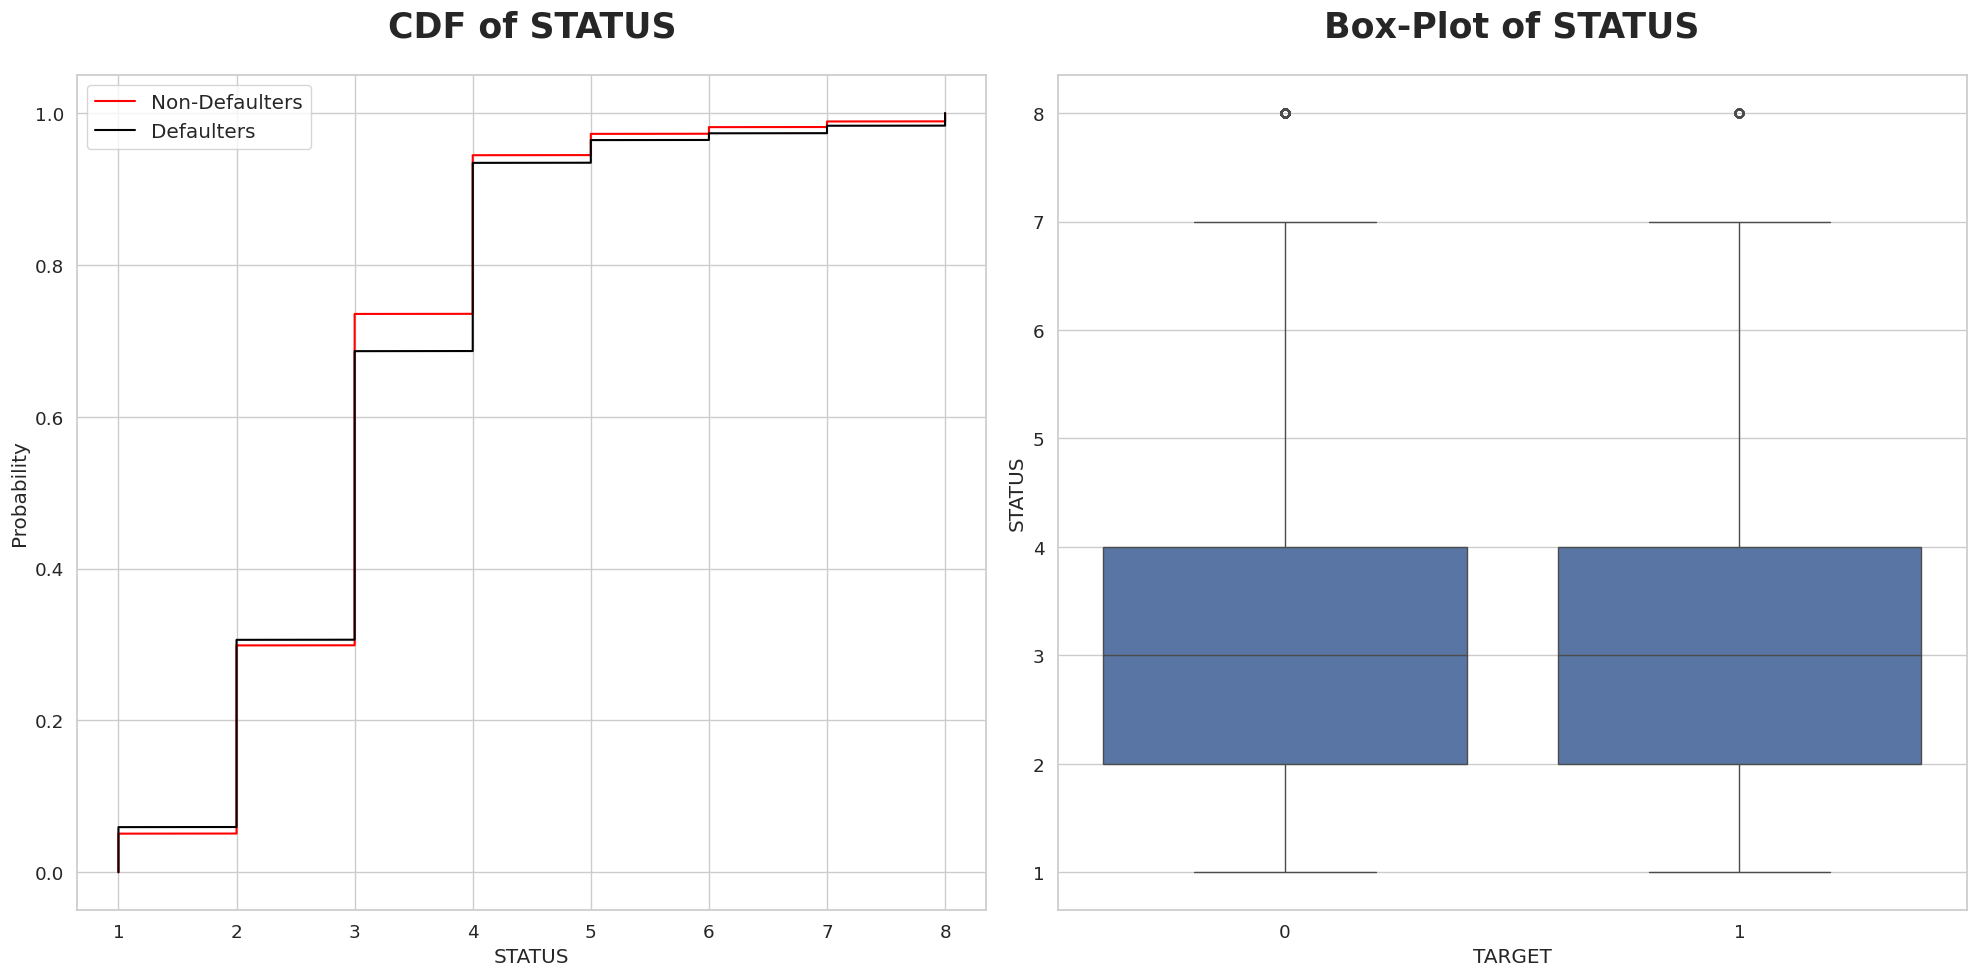

In [23]:
plot_continuous_variables(gp,'STATUS', plots = ['CDF','box'],figsize=(20,10))

##### Observations and Conclusions:

It can be said that the number of statuses does not affect whether customers have difficulty repaying debt or not because the distribution is very similar.

# *6. OBSERVATION AND CONCLUSION*

1. Imbalance
    - 'MONTHS_BALANCE': Imbalance ratio is reported as "None," indicating a balanced distribution or continuous nature.
    - 'STATUS': The imbalance ratio is calculated as 0.0004, signifying a highly imbalanced distribution. This could be crucial information when working with machine learning models, as they might struggle to learn patterns in highly imbalanced datasets.

2. Outliers:
There are no observations identified as outliers exist in the DataFrame

3. Missing Values:
There are no missing values in exist in the DataFrame

4. Category column: 'STATUS'
    - Number of unique values: 8
    - Percentage of NaN Values: 0.0%. There are no missing values for the 'STATUS' feature.